# Hello World example on a 2-qbit Bell state

## Map the problem to circuits and operators

In [ ]:
!pip install python-dotenv

In [34]:
from qiskit_ibm_runtime import QiskitRuntimeService

# get enviornment variables-set in an .env file-
import os
from dotenv import load_dotenv

load_dotenv()
# connect to IBM service
QiskitRuntimeService.save_account(channel="ibm_quantum", token=os.environ.get('IBM_API_TOKEN'), overwrite=True)

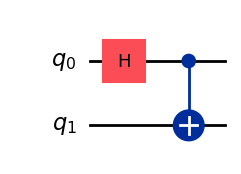

In [26]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output="mpl")

In [4]:
from qiskit.quantum_info import SparsePauliOp

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]

observables = [SparsePauliOp(label) for label in observables_labels]


## Step 2. Optimize the circuits and operators

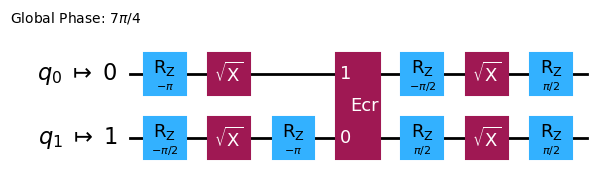

In [36]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw('mpl', idle_wires=False)

## Step 3. Execute using the quantum primitives

In [37]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator

estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

job = estimator.run([(isa_circuit, mapped_observables)])

# print(f">>> job ID: {job.job_id()}")

In [23]:
job.result()

pub_result = job.result()[0]

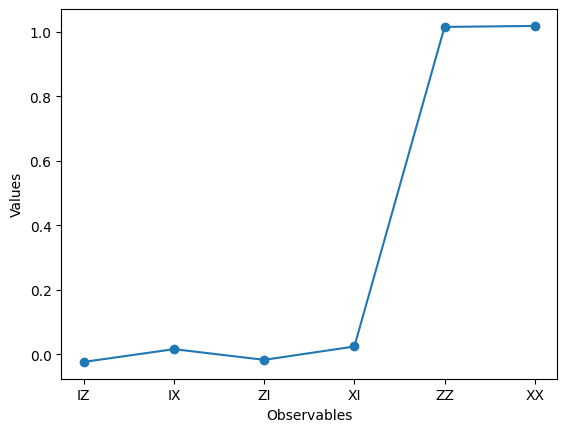

In [33]:
from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# graphs
plt.plot(observables_labels, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()